In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from myst_nb import glue 

from plastockmethods import name_the_zones, name_the_particles, frequentation_name, situation_name
from plastockmethods import particle_groups, name_the_substrate, name_the_distance, table_css_styles

work_data = pd.read_csv("data/end_pipe/long_form_micro.csv")
wide_form = pd.read_csv("data/end_pipe/aggregated_micro_results.csv")
beach_data = pd.read_csv("data/end_pipe/asl_beaches.csv")

# Annex

```{figure} resources/maps/annex_map_regions.jpeg
---
name: annex_map
---
```

Les résultats sont détaillés pour chaque attribut et chaque lieu. Les quatre sections de l'annexe sont séparées en fonction des macropolluants et des micropolluants. Un chapitre résume les résultats par plage et l'emplacement de l'échantillon sur chaque plage, et un chapitre est consacré aux attributs de le site d'échantillonage.

In [2]:
work_data["particules"] = work_data["compte"]
a_property =  {'color' : 'red'}

## Comptes par échantillon et plage

In [3]:
sample_totals = work_data.groupby(["Plage","echantillon"], as_index=False). particules.sum()
df2 = sample_totals.copy()
value_column = "moyenne"

# summary_particuless = sample_totals. particules.describe()

# summary_particuless_display =  translate_describe(summary_particuless, "particules").style.set_table_styles(table_css_styles).format(precision=2)
# summary_particuless_display.set_caption("Valeurs récapitulatives des totaux des échantillons.")

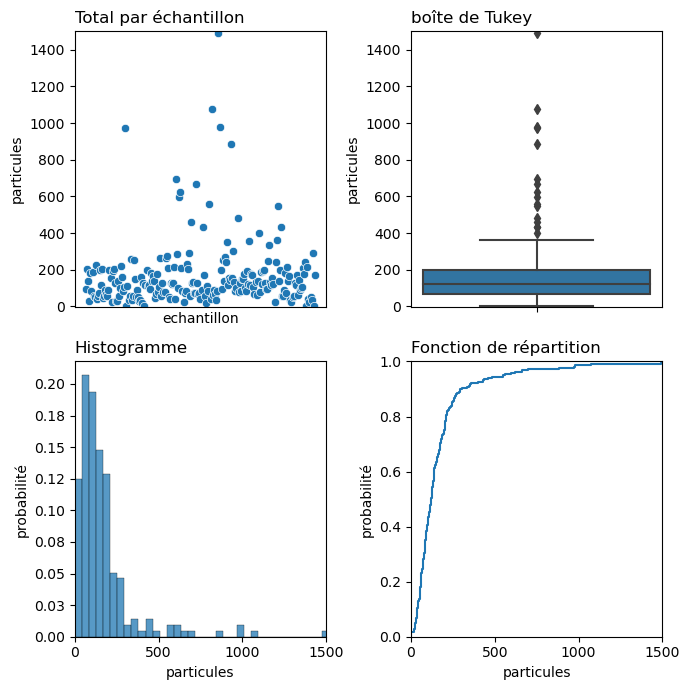

In [4]:
fig, ax = plt.subplots(2,2, figsize=(7,7))

sns.scatterplot(data=sample_totals, x="echantillon", y="particules", ax=ax[0,0])
ax[0,0].tick_params(labelbottom=False, bottom=False)
ax[0,0].set_ylim(-1, 1500)
ax[0,0].set_title("Total par échantillon", loc="left")

sns.boxplot(data=sample_totals, y="particules", dodge=False, width=.9, ax=ax[0,1])
ax[0,1].set_ylim(-1, 1500)
ax[0,1].set_title("boîte de Tukey", loc="left")

sns.histplot(data=sample_totals, x="particules", ax=ax[1,0], stat="probability")
ax[1,0].set_xlim(-1, 1500)
ax[1,0].yaxis.set_major_formatter('{x:.2f}')
ax[1,0].set_ylabel("probabilité")
ax[1,0].set_title("Histogramme", loc="left")

sns.ecdfplot(data=sample_totals, x="particules", ax=ax[1,1])
ax[1,1].set_xlim(-1, 1500)
ax[1,1].set_ylabel("probabilité")
ax[1,1].set_title("Fonction de répartition", loc="left")
plt.tight_layout()

plt.show()

## Comptes par position et plage

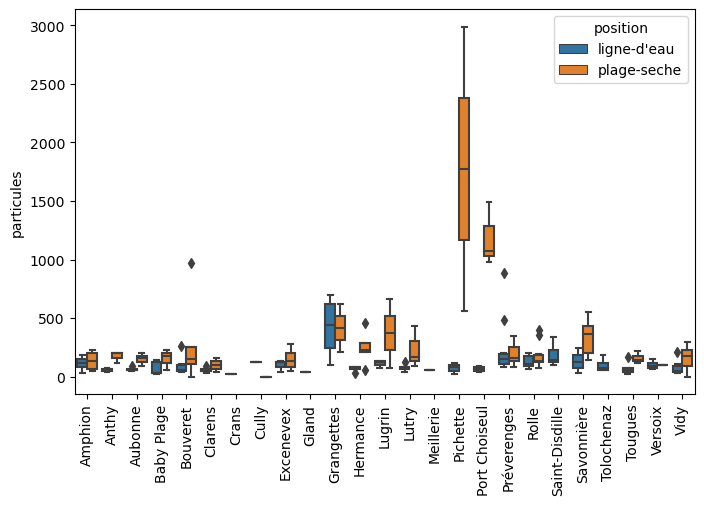

In [5]:
position_totals = work_data.groupby(["Plage","echantillon", "position"], as_index=False).particules.sum()
position_totals["position"] = position_totals.position.apply(lambda x: name_the_zones[x])
df4 = position_totals.groupby(["Plage","position"], as_index=False).particules.mean()

fig, ax = plt.subplots(1, figsize=(8,5))

sns.boxplot(data=position_totals, x="Plage", y="particules", hue="position", ax=ax)

ax.set_xlabel("")
ax.tick_params(axis="x", labelrotation=90)

plt.show()

### Comptes par forme de particule

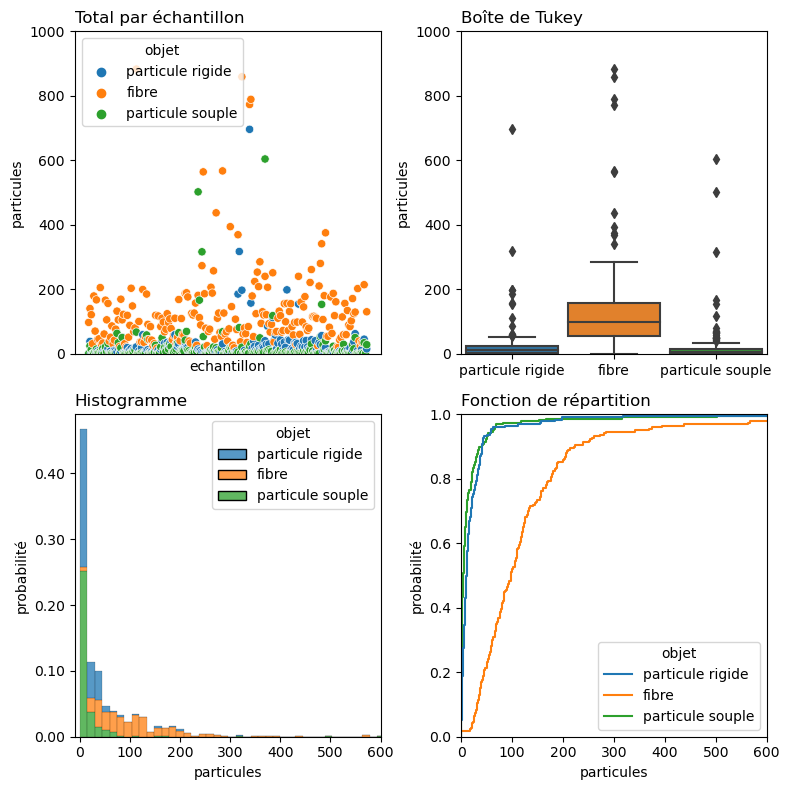

In [6]:
forme_totals = work_data.groupby(["Plage","echantillon", "objet"], as_index=False).particules.sum()
df3 = forme_totals.copy()

fig, ax = plt.subplots(2,2, figsize=(8,8))

df3["objet"] = df3["objet"].apply(lambda x: particle_groups[x])

sns.scatterplot(data=df3, x="echantillon", y="particules", hue="objet", ax=ax[0,0])
ax[0,0].tick_params(labelbottom=False, bottom=False)
ax[0,0].set_ylim(-1, 1000)
ax[0,0].set_title("Total par échantillon", loc="left")
# ax[0,0].legend().remove()

sns.boxplot(data=df3, x="objet", y="particules", hue="objet", dodge=False, width=.9, ax=ax[0,1])
ax[0,1].set_ylim(-1, 1000)
ax[0,1].set_title("Boîte de Tukey", loc="left")
ax[0,1].set_xlabel("")
ax[0,1].legend().remove()

sns.histplot(data=df3, x="particules", hue="objet", ax=ax[1,0], multiple="stack", stat="probability")
ax[1,0].set_xlim(-10, 600)
ax[1,0].yaxis.set_major_formatter('{x:.2f}')
ax[1,0].set_ylabel("probabilité")
ax[1,0].set_title("Histogramme", loc="left")



sns.ecdfplot(data=df3, x="particules", hue="objet", ax=ax[1,1])
ax[1,1].set_xlim(-1, 600)
ax[1,1].set_ylabel("probabilité")
ax[1,1].set_title("Fonction de répartition", loc="left")

plt.tight_layout()


plt.show()

### Comptes par forme, position et plage

In [7]:
forme_totals = work_data.groupby(["Plage","echantillon", "objet"], as_index=False).particules.sum()
df3 = forme_totals.copy()


average_of_sample_formes = df3.groupby(["objet"], as_index=True).agg({"particules":"mean"})
average_of_sample_formes.rename(columns={"particules":value_column}, inplace=True)
average_of_sample_formes.index.name = None

caption_one = "Le nombre moyen par échantillon par plage et forme."
caption_two = " Les plages dont la moyenne des résultats est supérieur à la moyenne par échantillon du projet sont en rouge."
caption = f"{caption_one} {caption_two}"

fragment_columns = list(particle_groups.values())
position_columns = list(name_the_zones.values())
position_totals = work_data.groupby(["Plage","echantillon", "position", "objet"], as_index=False).particules.sum()
position_totals["position"] = position_totals.position.apply(lambda x: name_the_zones[x])
position_totals["objet"] = position_totals.objet.apply(lambda x: particle_groups[x])
df4 = position_totals.groupby(["Plage","position", "objet"], as_index=False).particules.mean()

df4 = df4.pivot(index="Plage", columns=["position", "objet"])
df4.index.name = None
df4.columns
# df4.fillna(0, inplace=True)

def select_a_set_of_values(data, column_one, search_index, search_value, average_of_sample_formes):
    
    return data.loc[data[column_one] > average_of_sample_formes.loc[search_index, search_value]]

args_one = [("particules", position_columns[0], x) for x in fragment_columns]
args_two = [("particules", position_columns[1], x) for x in fragment_columns]

args_0 = select_a_set_of_values(df4, args_one[0], list(particle_groups.keys())[0], value_column, average_of_sample_formes).index
args_1 = select_a_set_of_values(df4, args_one[1], list(particle_groups.keys())[1], value_column, average_of_sample_formes).index
args_2  = select_a_set_of_values(df4, args_one[2], list(particle_groups.keys())[2], value_column, average_of_sample_formes).index

args_2_0 = select_a_set_of_values(df4, args_two[0], list(particle_groups.keys())[0], value_column, average_of_sample_formes).index
args_2_1 = select_a_set_of_values(df4, args_two[1], list(particle_groups.keys())[1], value_column, average_of_sample_formes).index
args_2_2 = select_a_set_of_values(df4, args_two[2], list(particle_groups.keys())[2], value_column, average_of_sample_formes).index

sax = df4.style.set_table_styles(table_css_styles).set_caption(caption).format(precision=2)
  
sax = sax.set_properties(subset = pd.IndexSlice[args_2, args_one[2]],**a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_1,args_one[1]],**a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_0,args_one[0]], **a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_2, args_two[2]], **a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_1,args_two[1]],**a_property)
sax = sax.set_properties(subset = pd.IndexSlice[args_2_0,args_two[0]], **a_property)
sax

## Données pour la cartographie

In [8]:
work_data = pd.read_csv("data/end_pipe/long_form_micro.csv")
beach_data.set_index("Plage", inplace=True)

x_map = beach_data["x"]
y_map = beach_data["y"]


work_data["lat"] = work_data.Plage.apply(lambda x: x_map.loc[x])
work_data["lon"] = work_data.Plage.apply(lambda x: y_map.loc[x])
work_data.to_csv("data/geo_long_form.csv", index=False)

caption="Les points GPS sont ajoutés aux données de l'enquête et exportés au format .csv"

work_data.head().style.set_table_styles(table_css_styles).set_caption(caption)

,Plage,echantillon,orientation,position,substrat,frequentation,situation,distance,objet,compte,lat,lon
0,Amphion,74_Amp_1,NE,1,4,3,1,1,fibres,97,46.398117,6.534083
1,Amphion,74_Amp_10,NNE,2,4,3,1,1,fibres,140,46.398117,6.534083
2,Amphion,74_Amp_2,NNE,1,4,3,1,1,fibres,121,46.398117,6.534083
3,Amphion,74_Amp_3,NE,1,4,3,1,1,fibres,31,46.398117,6.534083
4,Amphion,74_Amp_4,NNE,1,4,3,1,1,fibres,179,46.398117,6.534083


In [9]:
wide_form = pd.read_csv("data/end_pipe/aggregated_micro_results.csv")
wide_cols = ['Plage', 'echantillon', 'position', 'substrat', 'added', 'fibres', 'fdure', 'souple',
       'fragments', 'frequentation', 'situation', 'distance', 'orientation',
       'lat', 'lon']

wide_form["lat"] = wide_form.Plage.apply(lambda x: x_map.loc[x])
wide_form["lon"] = wide_form.Plage.apply(lambda x: y_map.loc[x])
wide_form=wide_form
wfm = wide_form[wide_cols].copy()
wfm = wfm[~wfm.isna()].copy()
wfm.to_csv("data/geo_wide_form.csv", index=False)